In [1]:
import joblib

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# import functions from scripts
from scripts import times_model_ran, perform_grid_search, evaluate_predictions_plot

# import categorical data: 
from split_data import X_cat_train_scaled_std, X_cat_train_scaled_minmax, y_cat_train # train data
from split_data import X_cat_val_scaled_std, X_cat_val_scaled_minmax, y_cat_val # val data

# import non-categorical data:
from split_data import X_raw_train_scaled_std, X_raw_train_scaled_minmax, y_raw_train # train data
from split_data import X_raw_val_scaled_std, X_raw_val_scaled_minmax, y_raw_val # val data

# Setup for performing GridSearch

### The param_grid variable defined below will be used for tuning all versions of the dataset using Logistic Regression to ensure comparable results  

Versions are:  
- Categorical Dataset Standardized  
- Categorical Dataset Normalized  
- Non-Categorical Dataset Standardized  
- Non-Categorical Dataset Normalized  

In [2]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear'],
    'max_iter': [5, 25, 100],
    'fit_intercept': [True, False]
}

print(f"With the specified parameters, model will be fitted {times_model_ran(param_grid)} times")

With the specified parameters, model will be fitted 3200 times


# Tuning Parameters - Categorical Dataset - Standardized

In [3]:
grid_search_cat_std = perform_grid_search(X_cat_train_scaled_std, y_cat_train, param_grid, LogisticRegression(random_state = 42))

Grid search results

-------------------

'C' best param: 0.1
 out of: [0.1, 1, 10, 100]

'fit_intercept' best param: True
 out of: [True, False]

'max_iter' best param: 1
 out of: [1, 10, 100, 500]

'penalty' best param: l1
 out of: ['l1', 'l2', 'elasticnet', None]

'solver' best param: saga
 out of: ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear']

-------------------

Best score: 0.6745198172406924


# Tuning Parameters - Categorical Dataset - Normalized

In [5]:
grid_search_cat_minmax = perform_grid_search(X_cat_train_scaled_minmax, y_cat_train, param_grid, LogisticRegression(random_state = 42))

Grid search results

-------------------

'C' best param: 0.1
 out of: [0.1, 1, 10, 100]

'fit_intercept' best param: False
 out of: [True, False]

'max_iter' best param: 1
 out of: [1, 10, 100, 500]

'penalty' best param: l2
 out of: ['l1', 'l2', 'elasticnet', None]

'solver' best param: saga
 out of: ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear']

-------------------

Best score: 0.7011417873019287


# Tuning Parameters - Non-Categorical Dataset - Standardized

In [7]:
grid_search_raw_std = perform_grid_search(X_raw_train_scaled_std, y_raw_train, param_grid, LogisticRegression(random_state = 42))

Grid search results

-------------------

'C' best param: 1
 out of: [0.1, 1, 10, 100]

'fit_intercept' best param: True
 out of: [True, False]

'max_iter' best param: 1
 out of: [1, 10, 100, 500]

'penalty' best param: l1
 out of: ['l1', 'l2', 'elasticnet', None]

'solver' best param: saga
 out of: ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear']

-------------------

Best score: 0.7055152785840443


# Tuning Parameters - Non-Categorical Dataset - Normalized

In [9]:
grid_search_raw_minmax = perform_grid_search(X_raw_train_scaled_minmax, y_raw_train, param_grid, LogisticRegression(random_state = 42))

Grid search results

-------------------

'C' best param: 0.1
 out of: [0.1, 1, 10, 100]

'fit_intercept' best param: True
 out of: [True, False]

'max_iter' best param: 1
 out of: [1, 10, 100, 500]

'penalty' best param: l2
 out of: ['l1', 'l2', 'elasticnet', None]

'solver' best param: lbfgs
 out of: ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear']

-------------------

Best score: 0.761959512396557


# Predictions on Validation Data

### Categorical

In [11]:
# standardized
grid_search_cat_std.best_estimator_.get_params() # get best parameters
y_cat_std_pred = grid_search_cat_std.predict(X_cat_val_scaled_std) # make predictions on val based on them

# normalized
grid_search_cat_minmax.best_estimator_.get_params() # get best parameters
y_cat_minmax_pred = grid_search_cat_minmax.predict(X_cat_val_scaled_minmax) # make predictions on val based on them

### Non-Categorical

In [12]:
# standardized
grid_search_raw_std.best_estimator_.get_params() # get best parameters
y_raw_std_pred = grid_search_raw_std.predict(X_raw_val_scaled_std) # make predictions on val based on them

# normalized
grid_search_raw_minmax.best_estimator_.get_params() # get best parameters
y_raw_minmax_pred = grid_search_raw_minmax.predict(X_raw_val_scaled_minmax) # make predictions on val based on them

# Evaluating Performance of Model Versions

### Categorical Standardized

In [13]:
print(classification_report(y_cat_val, y_cat_std_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      6673
           1       0.73      0.62      0.67      6607

    accuracy                           0.70     13280
   macro avg       0.70      0.70      0.70     13280
weighted avg       0.70      0.70      0.70     13280



### Categorical Normalized

In [14]:
print(classification_report(y_cat_val, y_cat_minmax_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      6673
           1       0.73      0.63      0.68      6607

    accuracy                           0.70     13280
   macro avg       0.70      0.70      0.70     13280
weighted avg       0.70      0.70      0.70     13280



### Non-Categorical Standardized

In [15]:
print(classification_report(y_raw_val, y_raw_std_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6673
           1       0.76      0.64      0.69      6607

    accuracy                           0.72     13280
   macro avg       0.72      0.72      0.72     13280
weighted avg       0.72      0.72      0.72     13280



### Non-Categorical Normalized

In [16]:
print(classification_report(y_raw_val, y_raw_minmax_pred))

              precision    recall  f1-score   support

           0       0.86      0.16      0.27      6673
           1       0.53      0.97      0.69      6607

    accuracy                           0.57     13280
   macro avg       0.70      0.57      0.48     13280
weighted avg       0.70      0.57      0.48     13280



# Plotting Performance

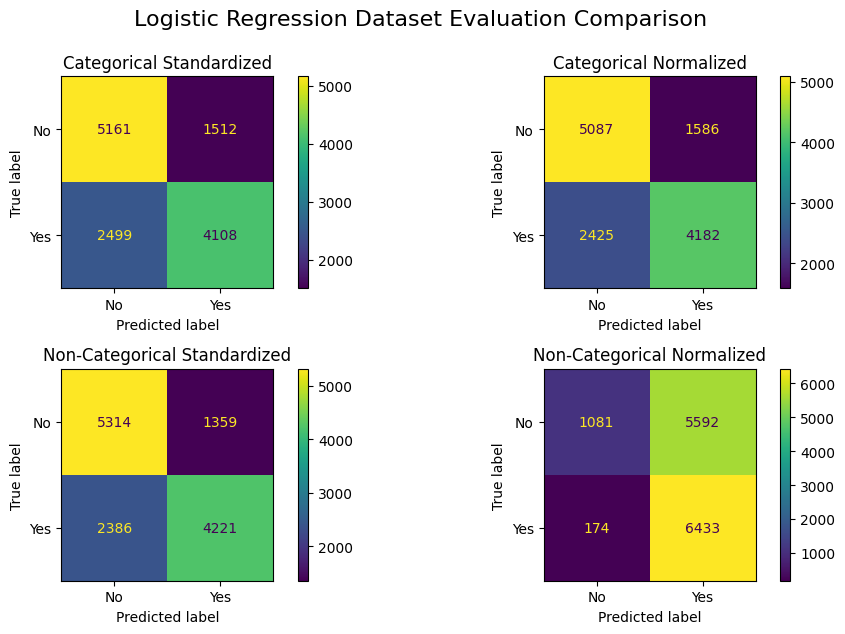

In [17]:
# variables to plot
ys = [y_cat_val, y_cat_val, y_raw_val, y_raw_val]
y_preds = [y_cat_std_pred, y_cat_minmax_pred, y_raw_std_pred, y_raw_minmax_pred]

# using evaluation plot function from scripts
fig = evaluate_predictions_plot(ys, y_preds, "Logistic Regression Dataset Evaluation Comparison")

# Selecting Dataset and Scaling

### Looking at the 4 different versions of the dataset across all 4 models:

The Non-Categorical dataset is consistently giving better results on validation data so those will be the chosen features  
When it comes to scaling the results are equally good across all models, except for Logistic Regression which gives much worse results on normalized data. Therefore standardization will be the chosen scaler  

As such, the chosen model is Non-Categorical Standardized

In [18]:
joblib.dump(grid_search_raw_std.best_estimator_, "models/best_lr.pkl")

['models/best_lr.pkl']